# 🚗 CarDekho Car Price Prediction Project

## 📄 Project Overview
This notebook demonstrates a machine learning workflow to predict the selling price of cars based on various features like the car's age, fuel type, seller type, and more. It follows the typical steps of a data science project:
- Data loading and preprocessing
- Exploratory data analysis
- Model training and evaluation
- Final predictions

The project is based on the **CarDekho dataset** commonly used for regression problems.

## 📁 Dataset Info
- **Source**: CarDekho
- **Features**: Year, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner
- **Target**: Selling_Price

## 🔍 Goal
To predict the **Selling Price** of used cars using regression algorithms with good accuracy.

## 🔧 ML Techniques Used
- Label Encoding
- Feature Importance via ExtraTreesRegressor
- Train/Test Split
- Random Forest Regressor (R², RMSE Evaluation)


In [6]:
# Importing necessary libraries for data analysis, visualization, and data download
# pandas for data manipulation, numpy for numerical operations
# matplotlib/seaborn/plotly for visualization, urllib for downloading data
## import the necessary files 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline

## download and import the csv data as pandasframe

In [7]:
# Importing necessary libraries for data analysis, visualization, and data download
# pandas for data manipulation, numpy for numerical operations
# matplotlib/seaborn/plotly for visualization, urllib for downloading data
import os
import urllib.request
import pandas as pd

download_dir = "./data/"
os.makedirs(download_dir, exist_ok=True)

# Direct download link to the Excel file
download_url = "https://github.com/umangrana/Car-Price-Prediction---CarDekho-Dataset/blob/main/Cardekho%20Dataset.xlsx?raw=true"
filename = "Cardekho Dataset.xlsx"
download_file_path = os.path.join(download_dir, filename)

# Download the file
urllib.request.urlretrieve(download_url, download_file_path)

print('-'*100)
print('Data with name ' + filename + ' Downloaded at ' + download_file_path)
print('-'*100)

# Read the Excel file
df = pd.read_excel(download_file_path)
df.head()


----------------------------------------------------------------------------------------------------
Data with name Cardekho Dataset.xlsx Downloaded at ./data/Cardekho Dataset.xlsx
----------------------------------------------------------------------------------------------------


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


## 📦 1. Data Preprocessing
In this section, we load the dataset and perform initial cleaning, encoding categorical variables, and feature selection.

In [8]:
# Displaying the shape (rows, columns) and info of the dataset
print("the size of the dataframe is", df.shape)
print('-'*100)
print("the column name, record Count and data type are as follows:")
df.info()
print('-'*100)


the size of the dataframe is (8128, 12)
----------------------------------------------------------------------------------------------------
the column name, record Count and data type are as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes

In [9]:
# Identifying numerical and categorical features in the dataset
# Defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 6 numerical features : ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'seats']

We have 6 categorical features : ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power']


In [10]:
# Checking for missing values in the dataset
print("missing value presence in different columns of dataframe are as follows :")
print("-"*100)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() *100).sort_values(ascending=False)
pd.concat([total,percent], axis=1, keys=['Total','Percent'])

missing value presence in different columns of dataframe are as follows :
----------------------------------------------------------------------------------------------------


,Total,Percent
mileage(km/ltr/kg),221,2.718996
engine,221,2.718996
seats,221,2.718996
max_power,215,2.645177
name,0,0.000000
year,0,0.000000
selling_price,0,0.000000
km_driven,0,0.000000
fuel,0,0.000000
seller_type,0,0.000000


In [11]:
print("summary statistics of numerical feautures for dataframe are as follows")
print("-"*100)
df.describe()
     

summary statistics of numerical feautures for dataframe are as follows
----------------------------------------------------------------------------------------------------


,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [12]:
print("summary statistics of categorical feautures for dataframe are as follows")
print("-"*100)
df.describe(include="object")

summary statistics of categorical feautures for dataframe are as follows
----------------------------------------------------------------------------------------------------


,name,fuel,seller_type,transmission,owner,max_power
count,8128,8128,8128,8128,8128,7913
unique,2058,4,3,2,5,320
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,74
freq,129,4402,6766,7078,5289,377


In [13]:
print('-'*125)
print('Checking records for mis-spell, typo-error etc.')
print('-'*125)

print("'name' variable has {} unique categories : \n{}\n".format(df['name'].nunique(), df['name'].unique()))
print('-'*125)

print("'fuel' variable has {} unique categories : \n{}\n".format(df['fuel'].nunique(), df['fuel'].unique()))
print('-'*125)

print("'seller_type' variable has {} unique categories : \n{}\n".format(df['seller_type'].nunique(), df['seller_type'].unique()))
print('-'*125)

print("'transmission' variable has {} unique categories : \n{}\n".format(df['transmission'].nunique(), df['transmission'].unique()))
print('-'*125)

print("'owner' variable has {} unique categories : \n{}\n".format(df['owner'].nunique(), df['owner'].unique()))
print('-'*125)


-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc.
-----------------------------------------------------------------------------------------------------------------------------
'name' variable has 2058 unique categories : 
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']

-----------------------------------------------------------------------------------------------------------------------------
'fuel' variable has 4 unique categories : 
['Diesel' 'Petrol' 'LPG' 'CNG']

-----------------------------------------------------------------------------------------------------------------------------
'seller_type' variable has 3 unique categories : 
['Individual' 'Dealer' 'Trustmark Dealer']

--------------------

In [14]:
print(df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


## 📊 2. Exploratory Data Analysis
We visualize key relationships between features and the target.

In [15]:
print('-'*100)
print("The percentage of each category in categorical columns are as follow :")
print('-'*100 + '\n')

for col in categorical_features:
    print(f"Column: {col}")
    print(df[col].value_counts(normalize=True) * 100)
    print('-'*100)


----------------------------------------------------------------------------------------------------
The percentage of each category in categorical columns are as follow :
----------------------------------------------------------------------------------------------------

Column: name
name
Maruti Swift Dzire VDI                             1.587106
Maruti Alto 800 LXI                                1.008858
Maruti Alto LXi                                    0.873524
BMW X4 M Sport X xDrive20d                         0.762795
Maruti Swift VDI                                   0.750492
                                                     ...   
Skoda Fabia 1.4 TDI Ambiente                       0.012303
Mahindra Scorpio VLX 2WD AT BSIII                  0.012303
Renault KWID Climber 1.0 AMT                       0.012303
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV    0.012303
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV       0.012303
Name: proportion, Length: 2058, dtype: float64
-

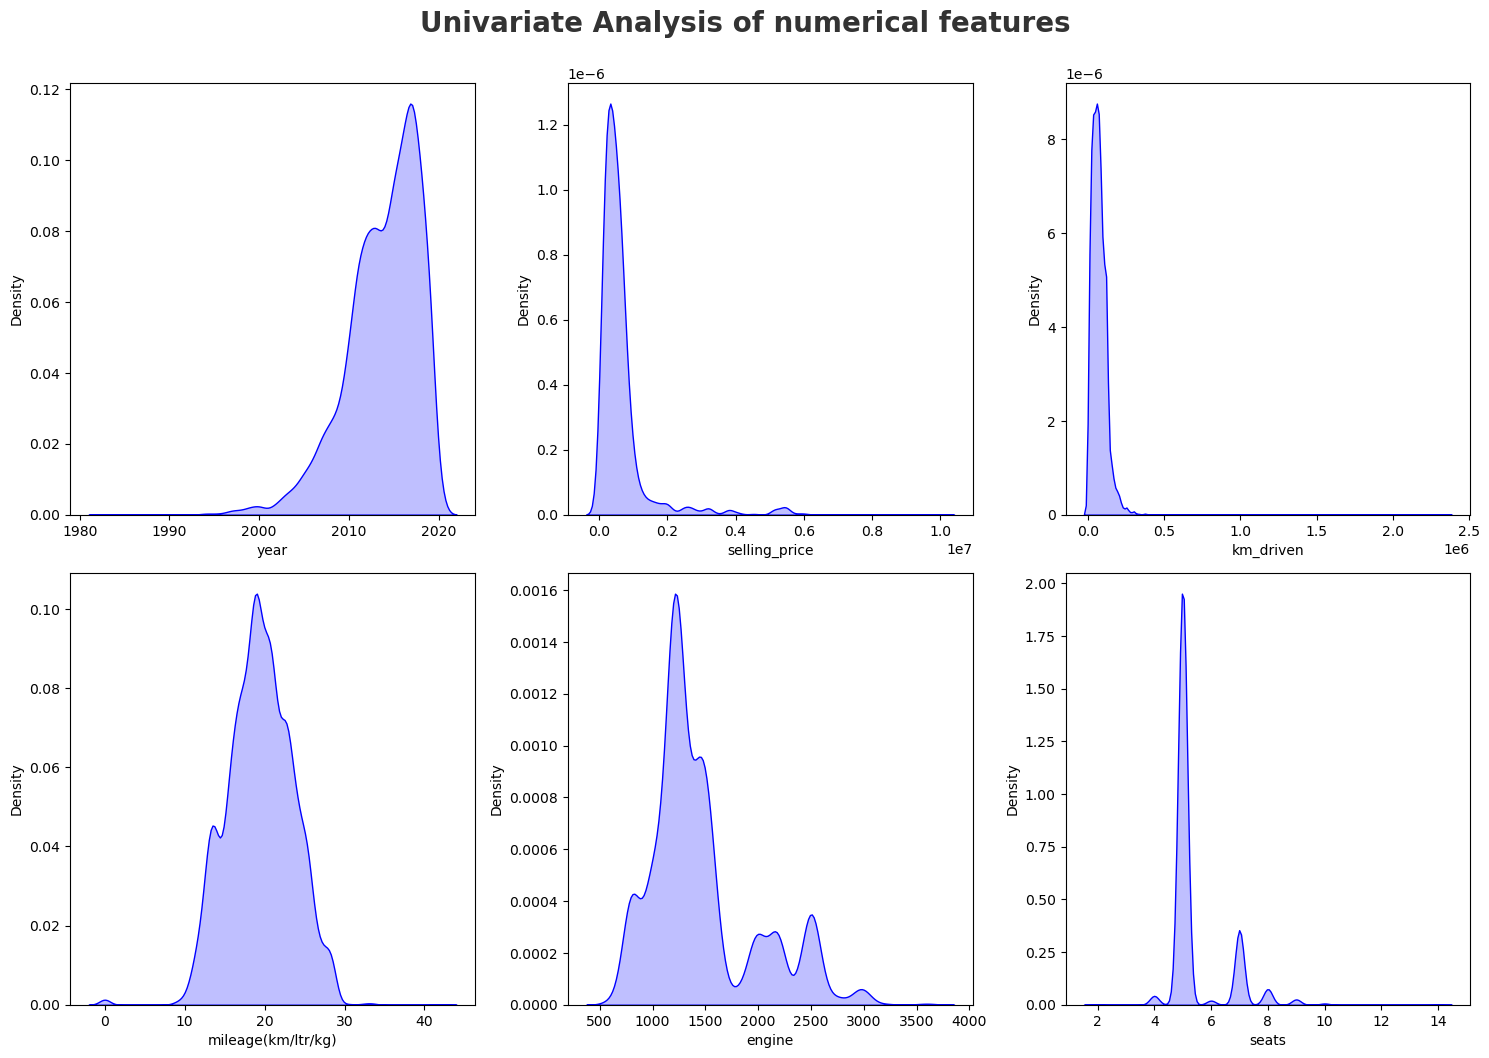

In [16]:
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate Analysis of numerical features", fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], shade=True, color='b')
    plt.xlabel(numeric_features[i])

plt.tight_layout()
plt.show()

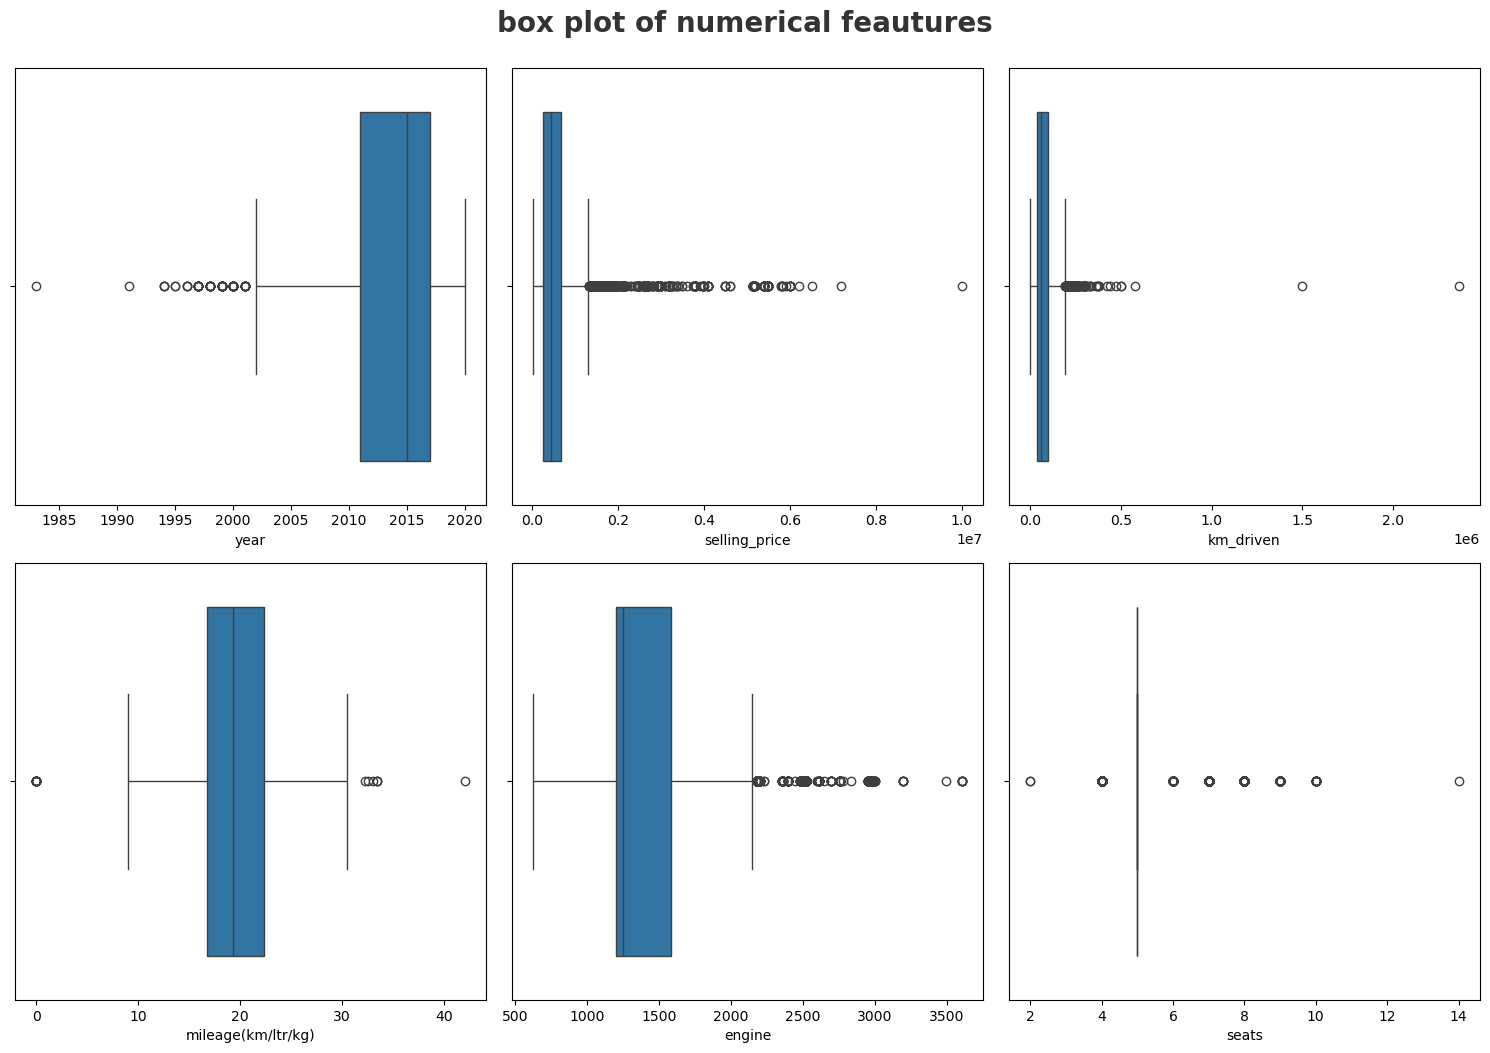

In [17]:
plt.figure(figsize=(15,15))
plt.suptitle('box plot of numerical feautures', fontsize=20, fontweight='bold', alpha = 0.8,y=1.0)
for i in range(0,len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
plt.tight_layout()
plt.show()


## 🧠 3. Model Training
Train a RandomForestRegressor and test the model on validation data.

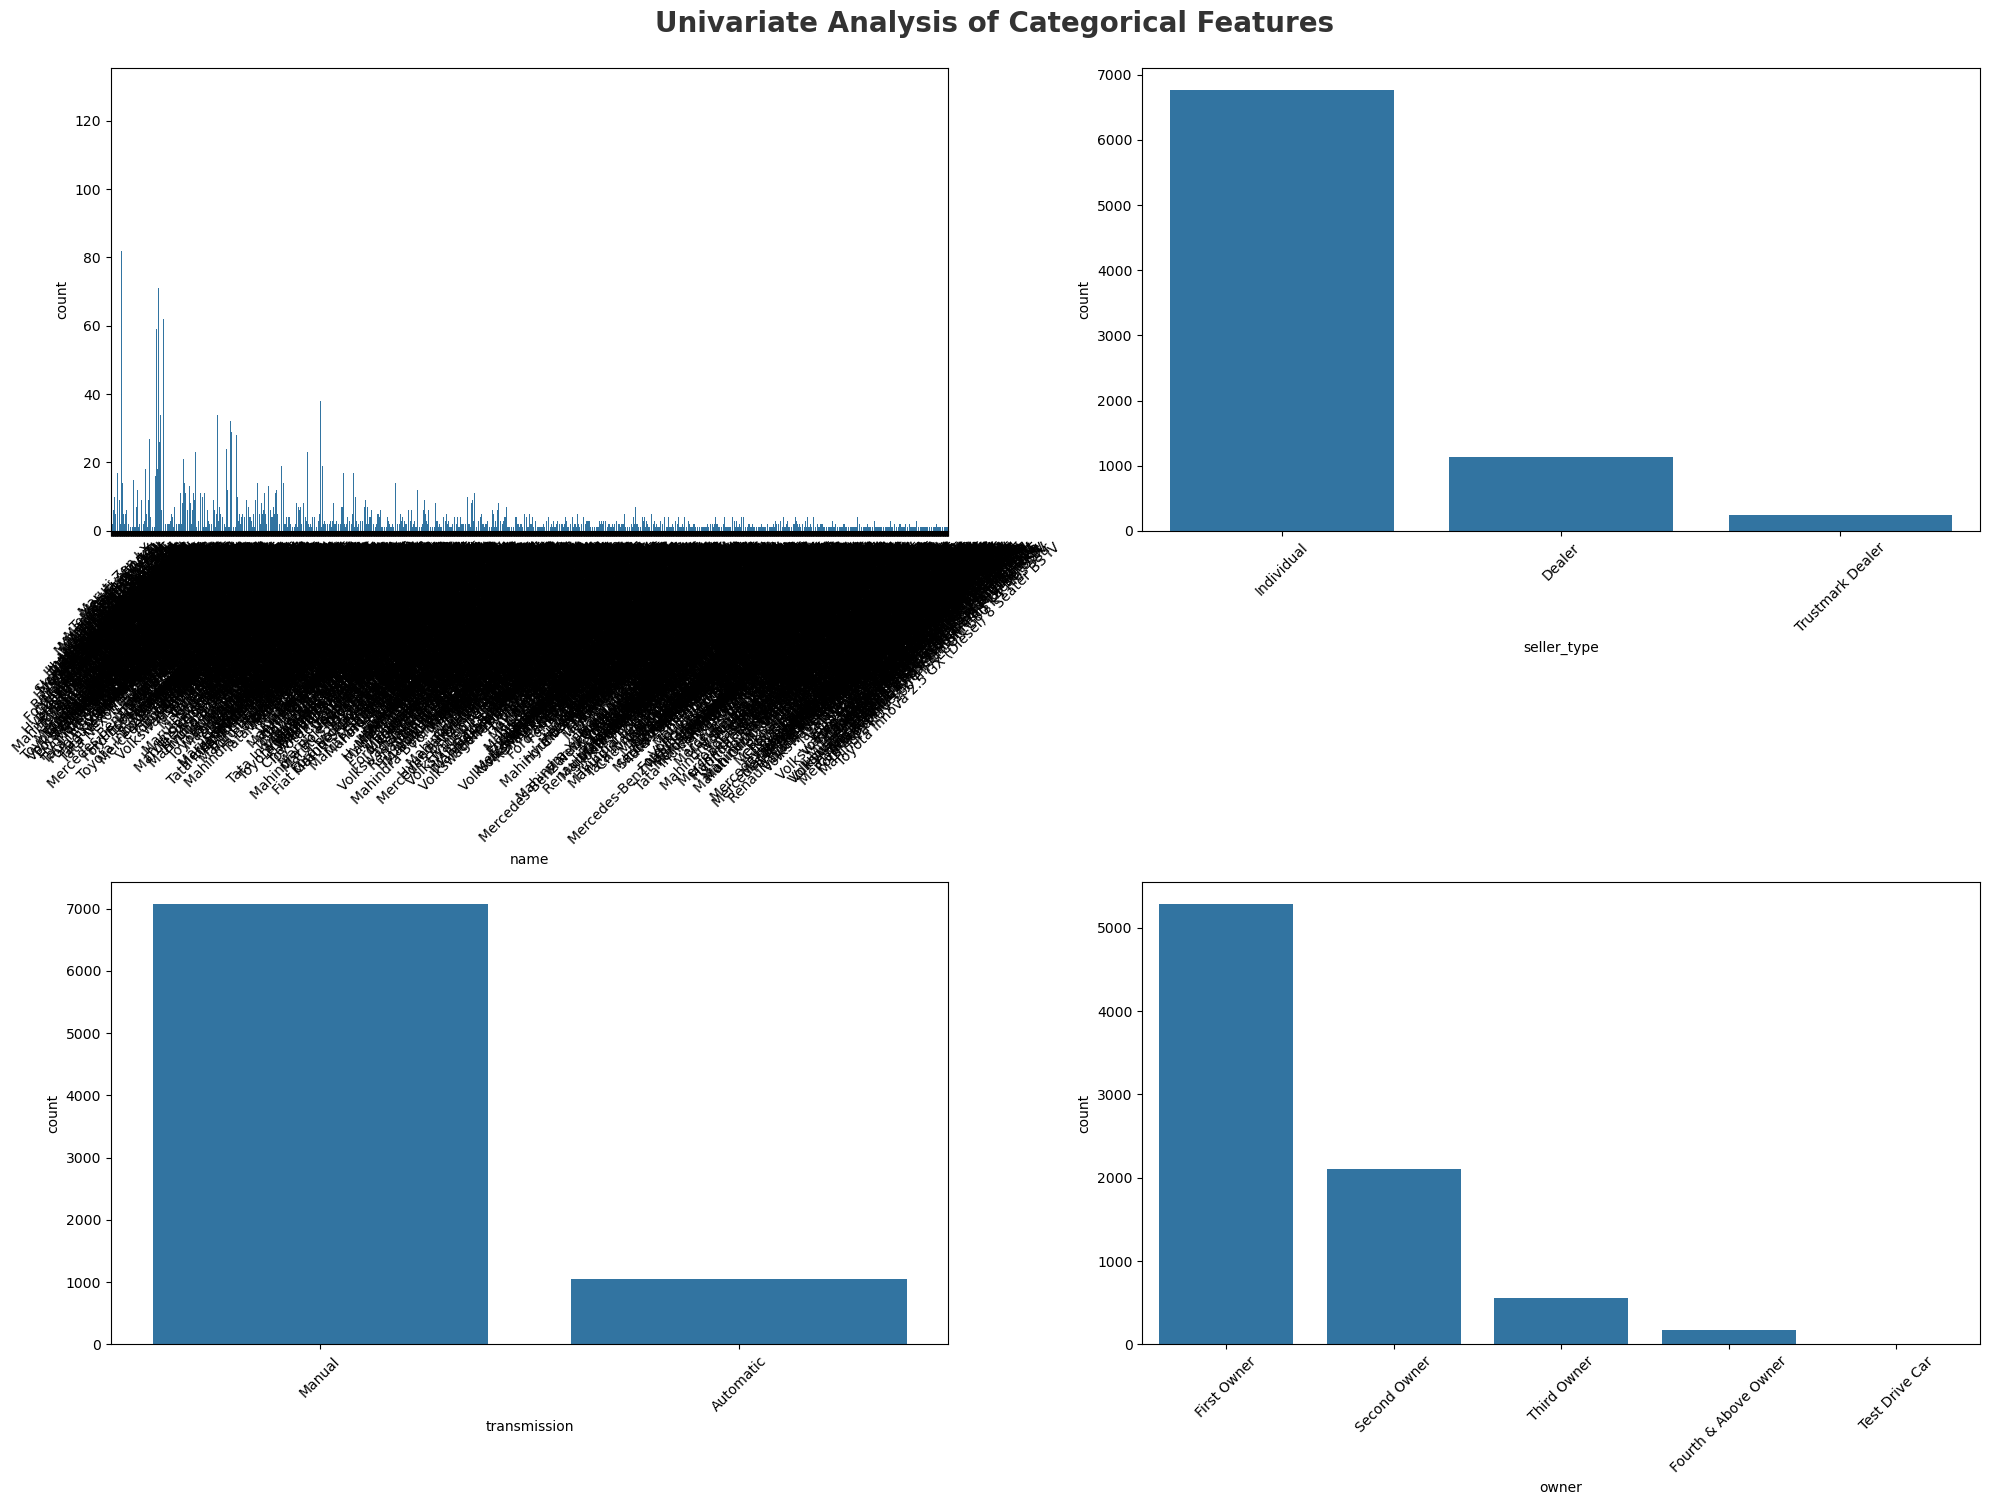

In [18]:
cat1 = ['name', 'seller_type', 'transmission', 'owner']

plt.figure(figsize=(20, 15))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.0)

for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [19]:
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) >= 10]
print('num of continuous features:', continuous_features)


num of continuous features: ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'seats']


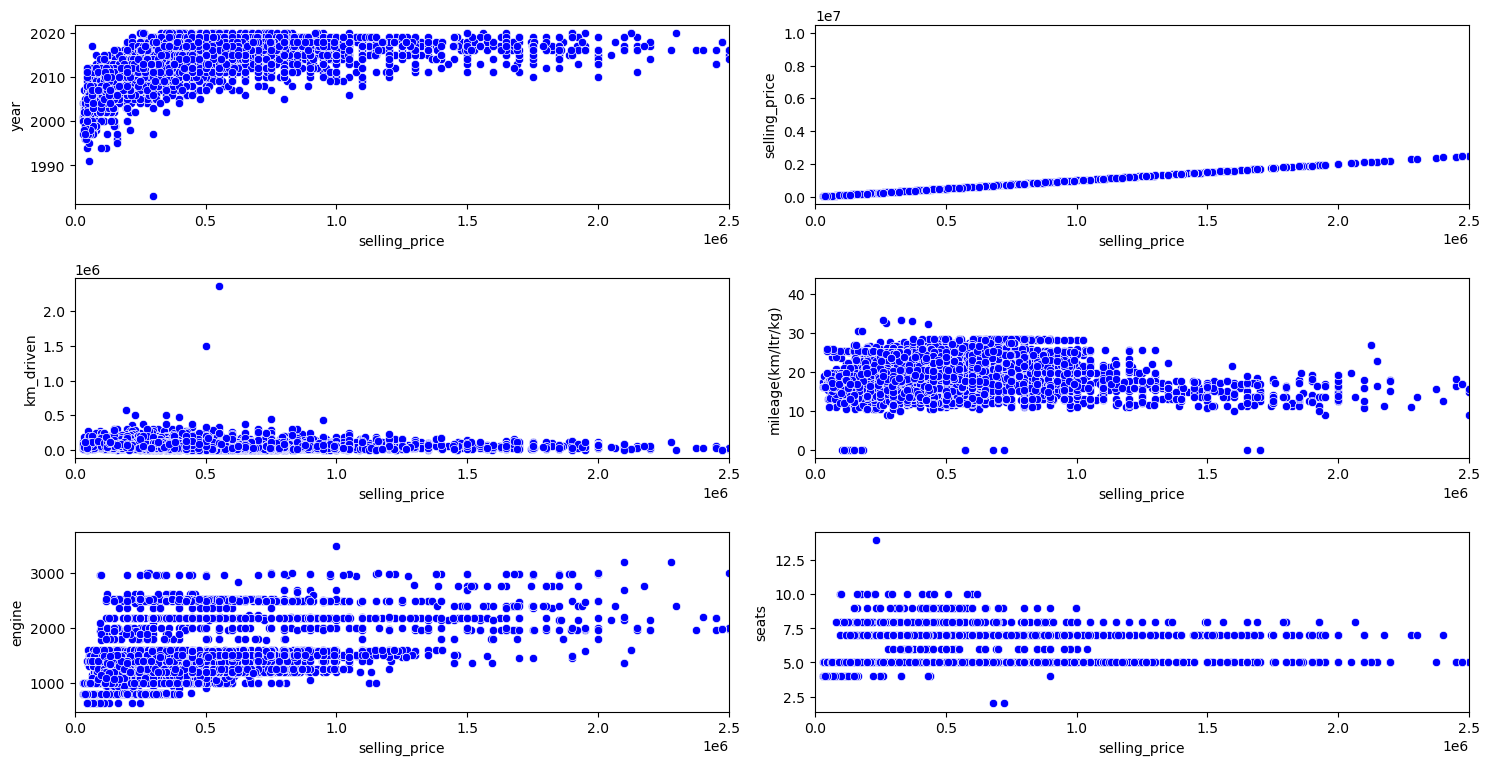

In [20]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)
    sns.scatterplot(data=df, x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0, 2500000)  # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()
plt.show()


In [21]:
df[numeric_features].corr()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,0.227336
mileage(km/ltr/kg),0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.452085
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.610309
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,1.000000


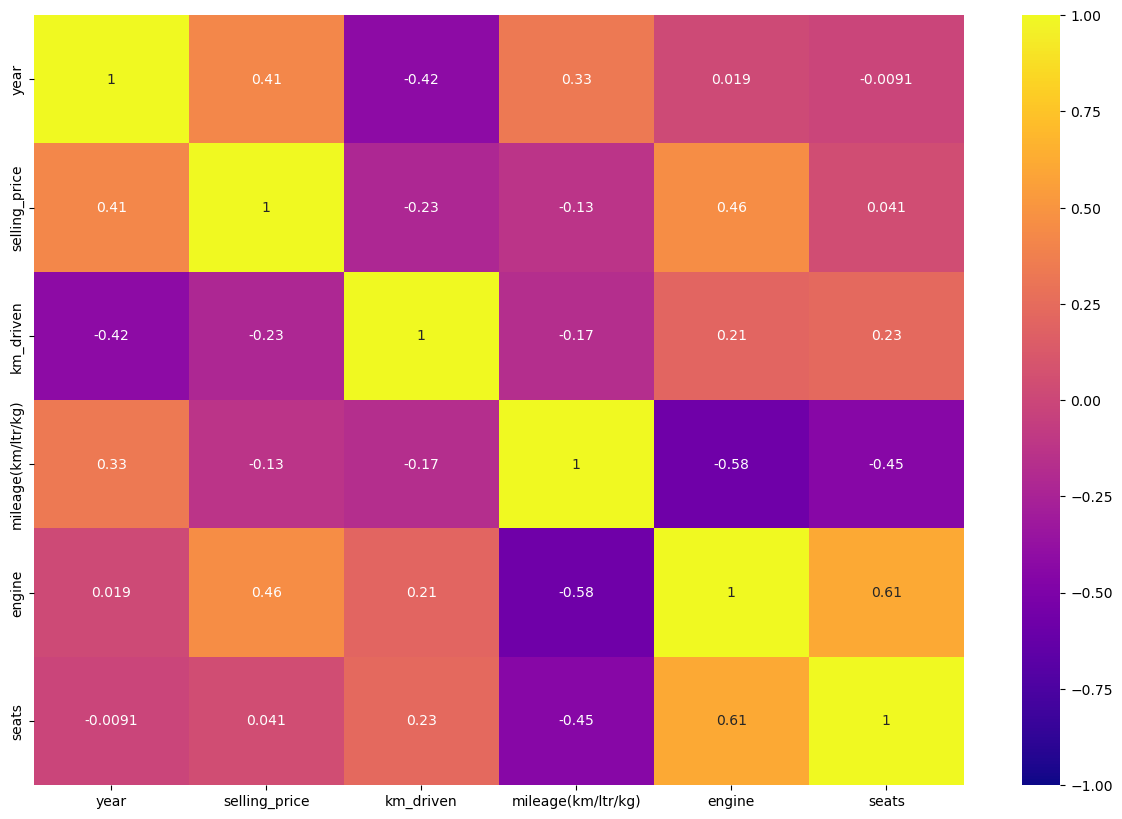

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(
    data=df[numeric_features].corr(),
    annot=True,
    cmap='plasma',
    vmin=-1,
    vmax=1,
    linecolor='white'
)
plt.show()


In [23]:
from scipy.stats import chi2_contingency

chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

test_result = pd.DataFrame(data=[categorical_features, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

print('-'*100)
print('Chi-Squared Test (Checking Multi-collinearity for Categorical features) results are as follows :')
print('-'*100)

test_result


----------------------------------------------------------------------------------------------------
Chi-Squared Test (Checking Multi-collinearity for Categorical features) results are as follows :
----------------------------------------------------------------------------------------------------


,Categorical Features,Hypothesis Result
0,name,Reject Null Hypothesis
1,fuel,Reject Null Hypothesis
2,seller_type,Reject Null Hypothesis
3,transmission,Reject Null Hypothesis
4,owner,Reject Null Hypothesis
5,max_power,Reject Null Hypothesis


## 📈 4. Evaluation
Use R² Score and Mean Absolute Error to assess performance.

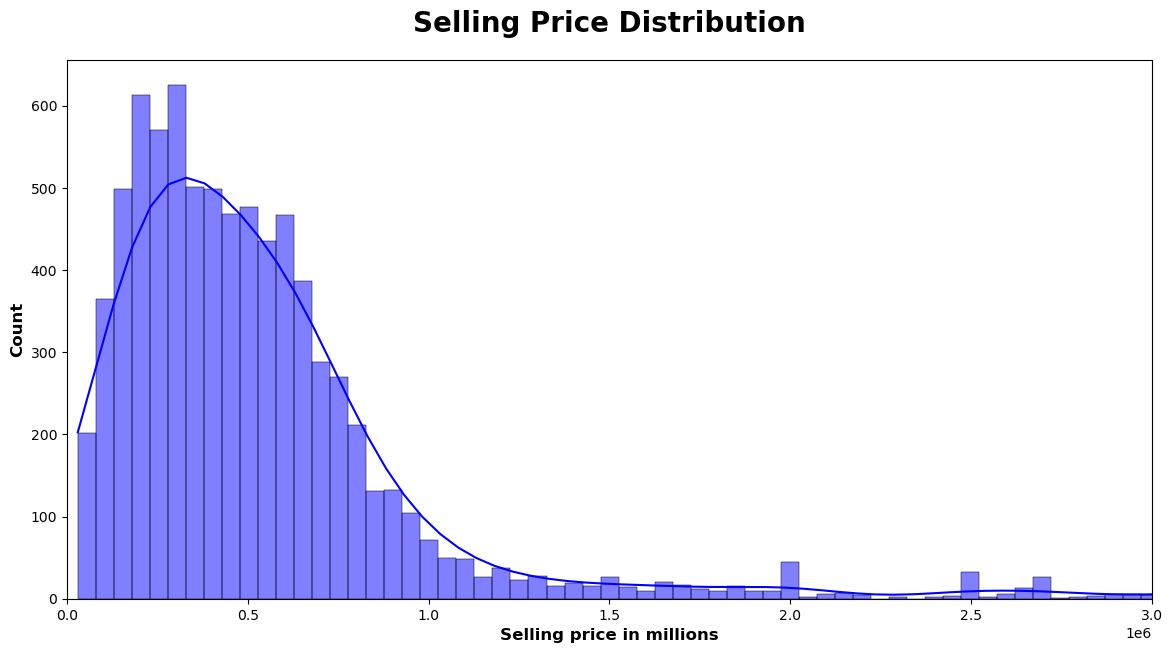

In [24]:
plt.subplots(figsize=(14, 7))
sns.histplot(df.selling_price, bins=200, kde=True, color='b')
plt.title("Selling Price Distribution", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0, 3000000)
plt.show()


In [25]:
print('-'*50)
print('Top 10 Sold Cars on CarDekho Website')
print('-'*50)
df.name.value_counts()[:10]

--------------------------------------------------
Top 10 Sold Cars on CarDekho Website
--------------------------------------------------


name
Maruti Swift Dzire VDI        129
Maruti Alto 800 LXI            82
Maruti Alto LXi                71
BMW X4 M Sport X xDrive20d     62
Maruti Swift VDI               61
Maruti Swift VDI BSIV          59
Maruti Wagon R LXI             53
Maruti Alto K10 VXI            50
Hyundai EON Era Plus           48
Maruti Wagon R VXI BS IV       45
Name: count, dtype: int64

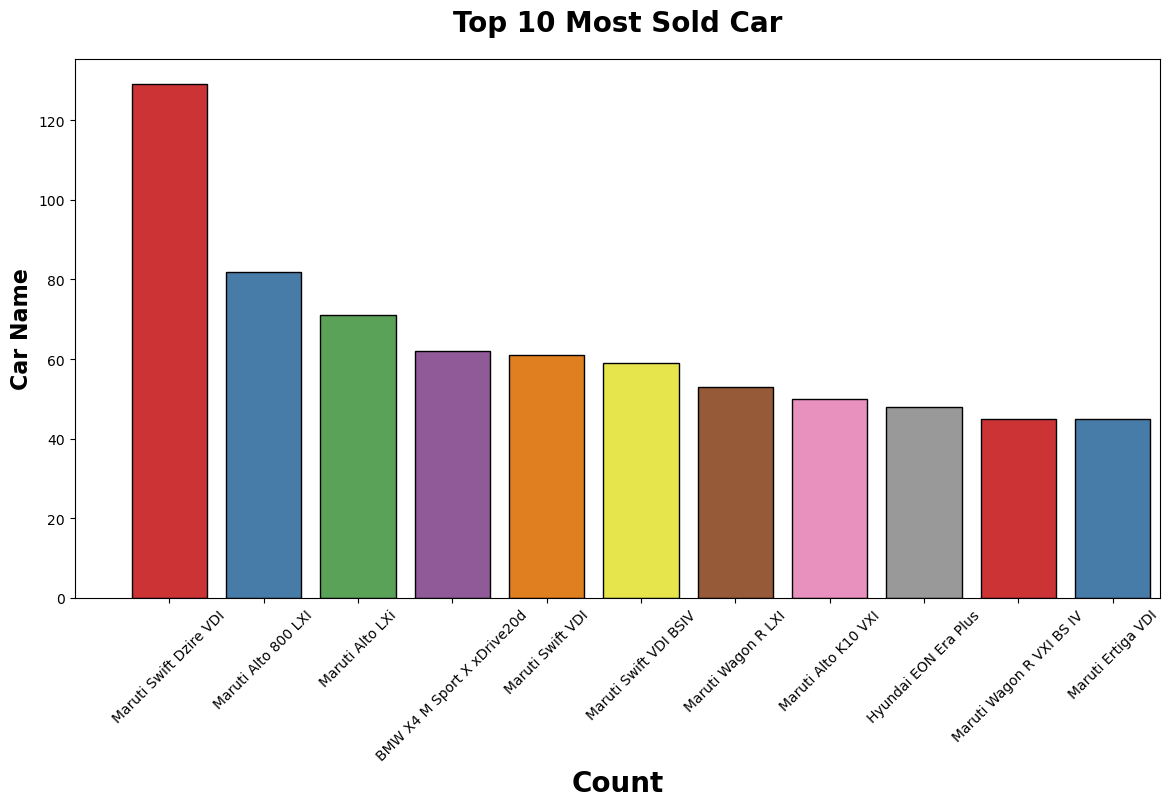

In [26]:

plt.subplots(figsize=(14,7))
sns.countplot(x="name", data=df, ec="black", palette="Set1",
              order=df['name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold", fontsize=20, pad=20)
plt.xlabel("Count", weight="bold", fontsize=20)
plt.ylabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=45)
plt.xlim(-1, 10.5)
plt.show()


In [27]:
# Check mean price of Hyundai i20 which is most sold
i20 = df[df['name'] == 'Maruti Swift Dzire VDI']['selling_price'].mean()
print(f"The mean price of Maruti Swift dzire vdi is {i20:.2f} Rupees")

# Top 10 Most Sold Car Brand on CarDekho Website
print('-'*50)
print('Top 10 Most Sold Car Brand')
print('-'*50)
df.seller_type.value_counts()[0:10]

The mean price of Maruti Swift dzire vdi is 578658.86 Rupees
--------------------------------------------------
Top 10 Most Sold Car Brand
--------------------------------------------------


seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

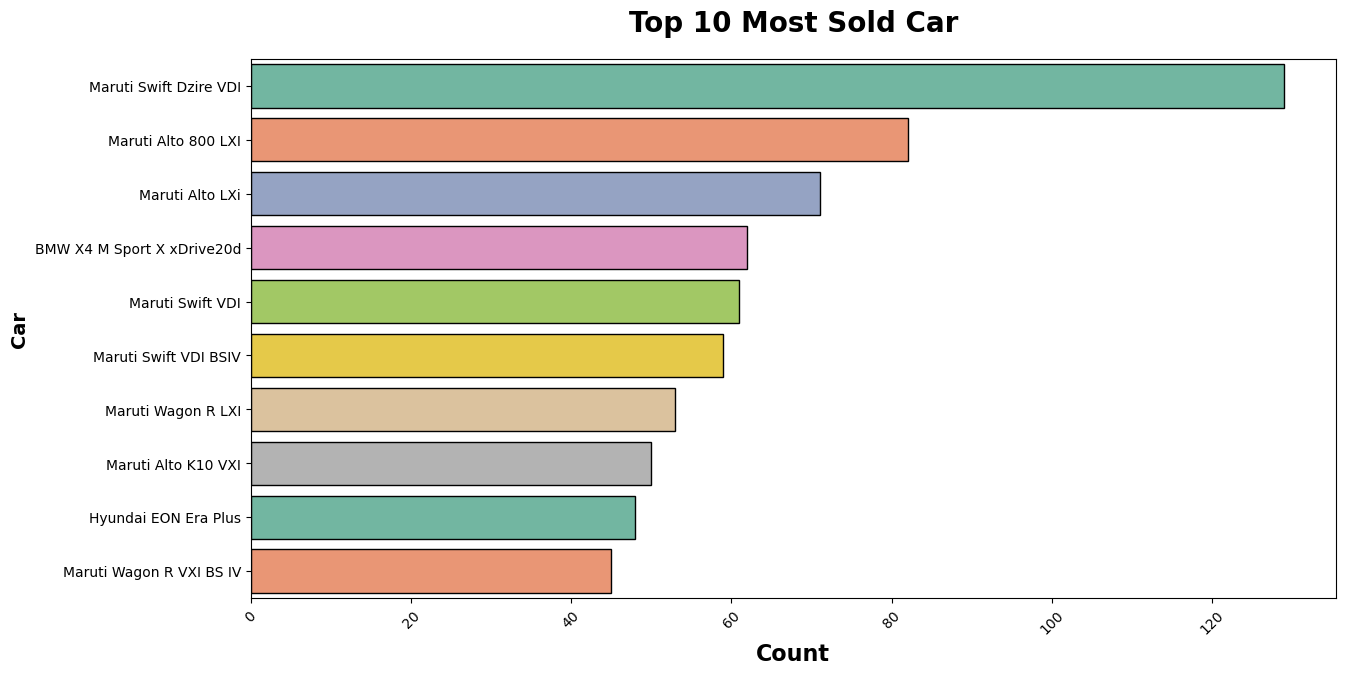

In [28]:
top10_names = df['name'].value_counts().index[:10]
plt.subplots(figsize=(14, 7))
sns.countplot(
    y="name", 
    data=df, 
    ec="black", 
    palette="Set2",
    order=top10_names
)
plt.title("Top 10 Most Sold Car", weight="bold", fontsize=20, pad=20)
plt.xlabel("Count", weight="bold", fontsize=16)
plt.ylabel("Car", weight="bold", fontsize=14)
plt.xticks(rotation=45)
plt.show()


## ✅ 5. Final Results & Future Work
Summarizing results and suggesting future improvements.

In [29]:
maruti = df[df['name']!="Maruti Swift Dzire VDI"]["selling_price"].mean()
print(f"The mean price of maruti is {maruti:.2f} Rupees")


The mean price of maruti is 639233.19 Rupees


In [30]:
car = df.groupby('name')['selling_price'].max()
car = car.to_frame().sort_values('selling_price', ascending=False)[:10]

print('-'*50)
print("Top 10 Costlier Cars on CarDekho Website")
print('-'*50)

car


--------------------------------------------------
Top 10 Costlier Cars on CarDekho Website
--------------------------------------------------


,selling_price
name,
Volvo XC90 T8 Excellence BSIV,10000000
BMW X7 xDrive 30d DPE,7200000
Audi A6 35 TFSI Matrix,6523000
BMW 6 Series GT 630d Luxury Line,6000000
Mercedes-Benz S-Class S 350 CDI,6000000
BMW X4 M Sport X xDrive20d,5800000
Volvo XC60 Inscription D5 BSIV,5500000
Volvo S90 D4 Inscription BSIV,5500000
Mercedes-Benz E-Class Exclusive E 200 BSIV,5200000


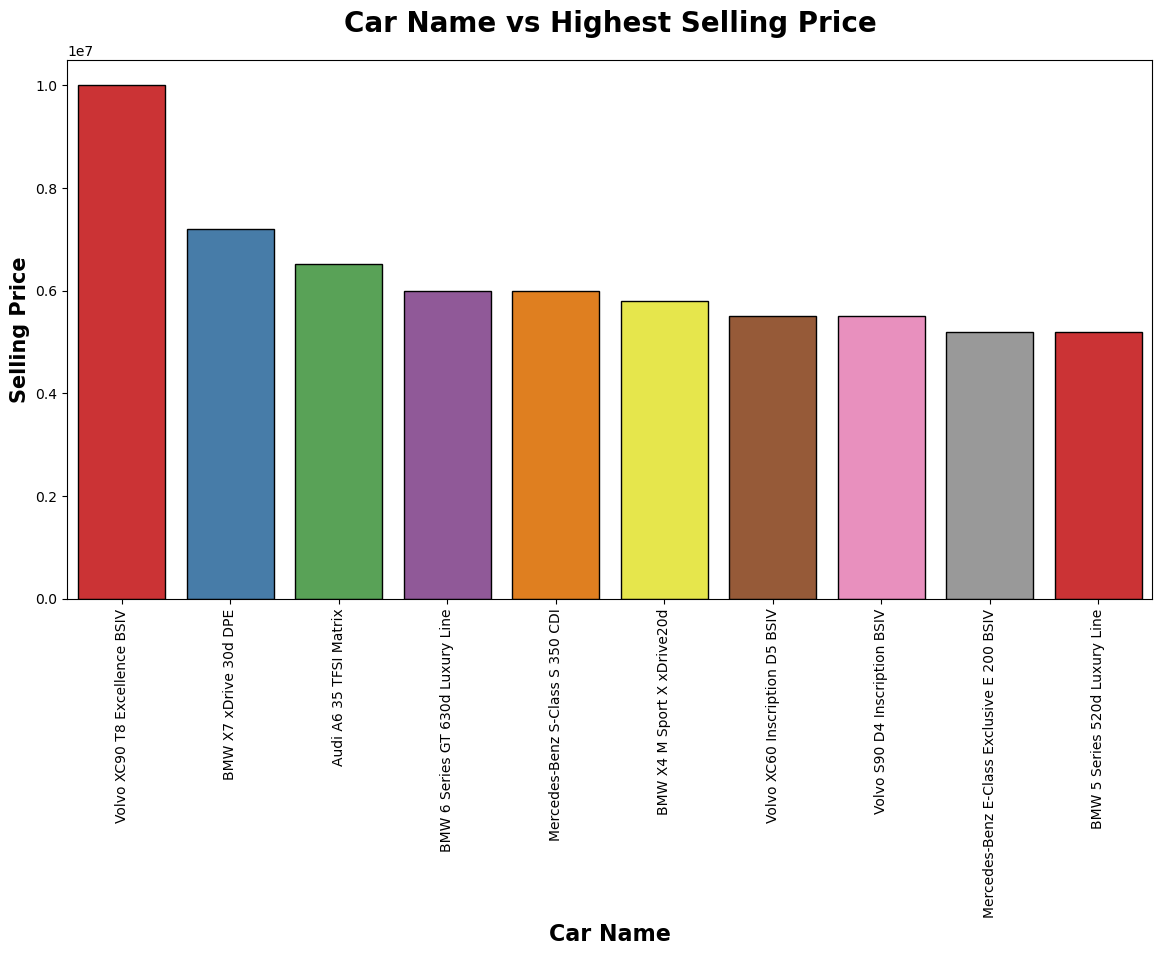

In [31]:
plt.subplots(figsize=(14,7))
sns.barplot(
    x=car.index, 
    y=car.selling_price, 
    ec="black", 
    palette="Set1"
)
plt.title("Car Name vs Highest Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


In [32]:
mileage = df.groupby('name')['mileage(km/ltr/kg)'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand on CarDekho Website!')
print('-'*50)

mileage.to_frame()


--------------------------------------------------
Most Mileage Car Brand on CarDekho Website!
--------------------------------------------------


,mileage(km/ltr/kg)
name,
Volvo XC90 T8 Excellence BSIV,42.000000
Maruti Alto 800 CNG LXI Optional,33.440000
Maruti Alto 800 LXI CNG,33.000000
Maruti Wagon R CNG LXI,32.520000
Maruti Alto K10 LXI CNG,32.260000
Maruti Alto 800 CNG LXI,31.453333
Maruti Swift AMT ZDI,28.400000
Maruti Swift AMT VDI,28.400000
Maruti Swift Dzire ZDI Plus,28.400000


In [33]:
print(df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


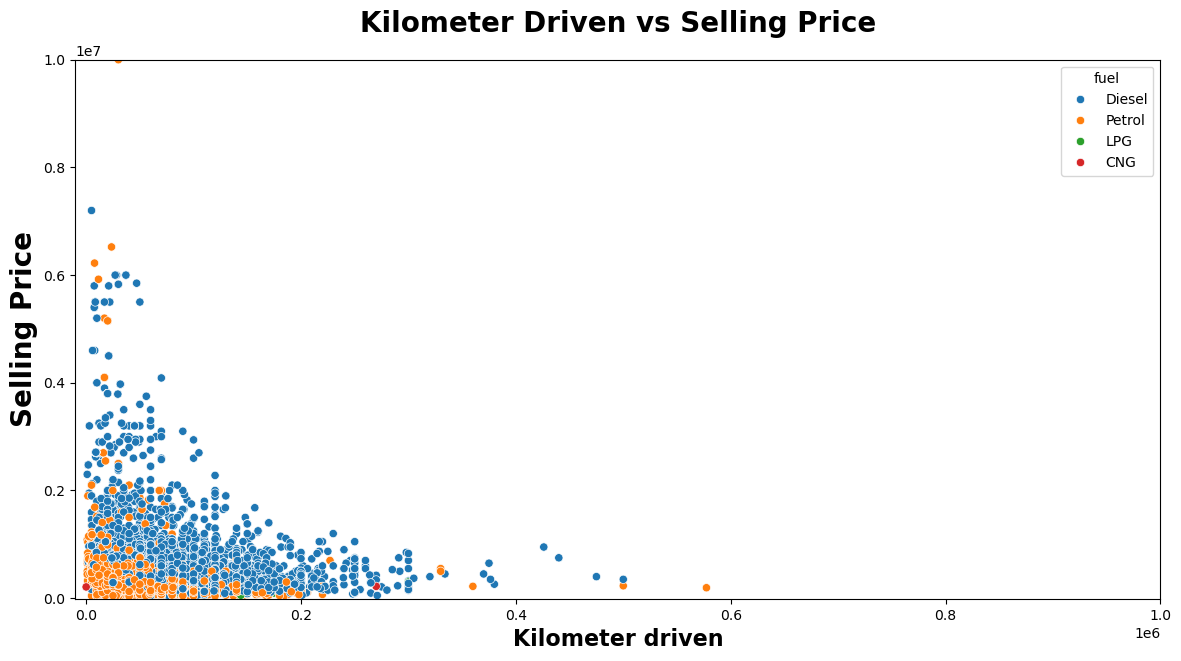

In [34]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df, ec = "white", color='b', hue='fuel')
plt.title("Kilometer Driven vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,1000000) # used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()


In [35]:
fuel = df.groupby('fuel')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()


,selling_price
fuel,
Diesel,550000.0
Petrol,345000.0
CNG,320000.0
LPG,195500.0


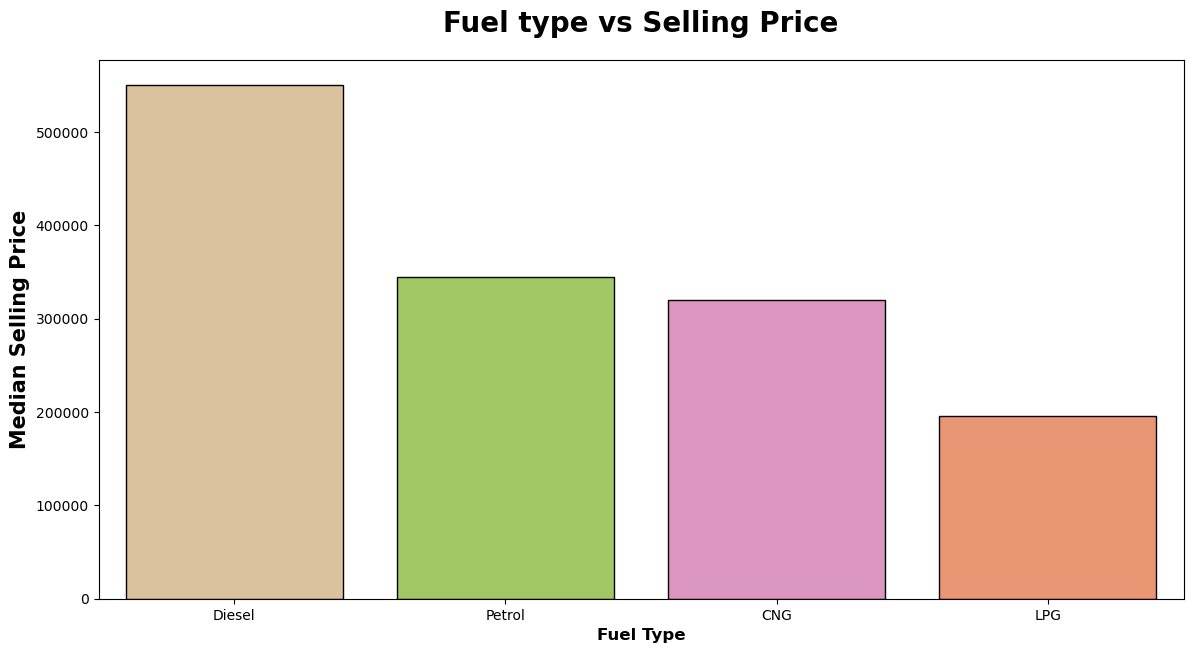

In [36]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index, y=fuel.values, ec="black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()


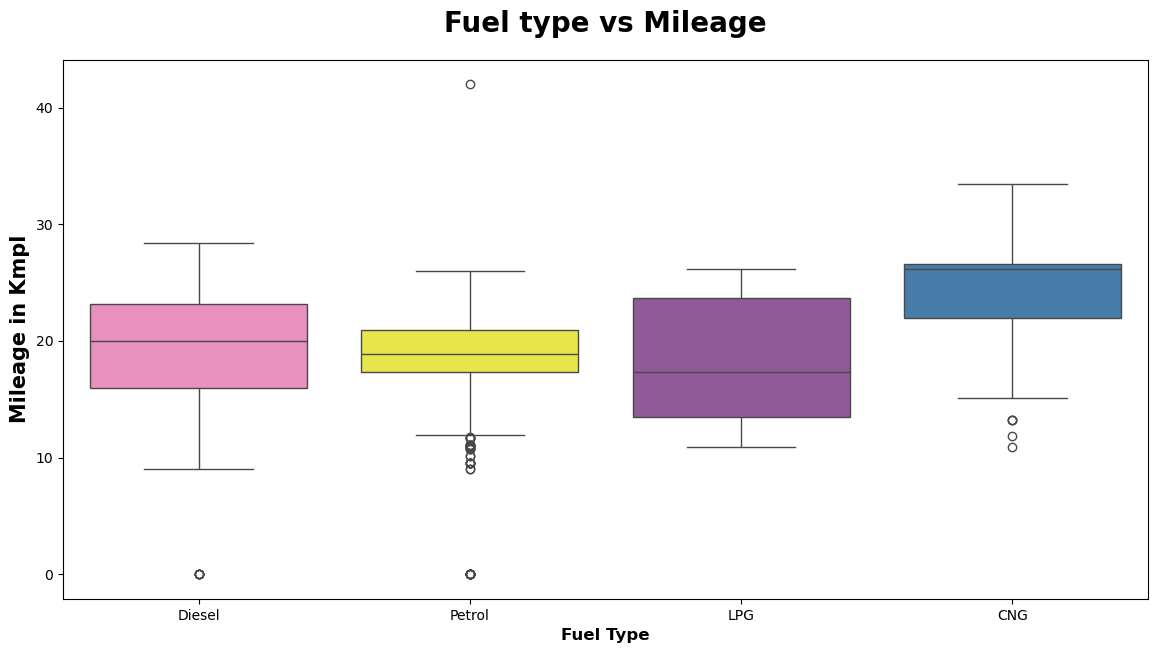

In [37]:
plt.subplots(figsize=(14,7))
sns.boxplot(x="fuel", y="mileage(km/ltr/kg)", data=df, palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold", fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()


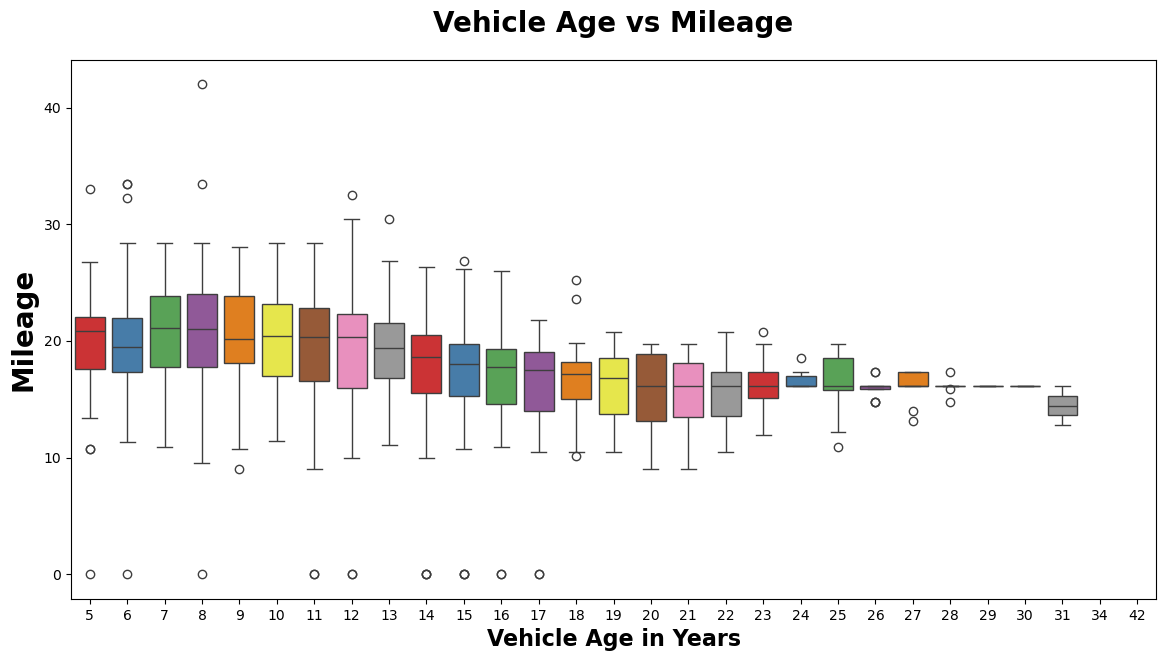

In [38]:
# Create vehicle_age column (assuming 2025 is your reference year)
df['vehicle_age'] = 2025 - df['year']

plt.subplots(figsize=(14,7))
sns.boxplot(x=df['vehicle_age'], y=df['mileage(km/ltr/kg)'], palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold", fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()


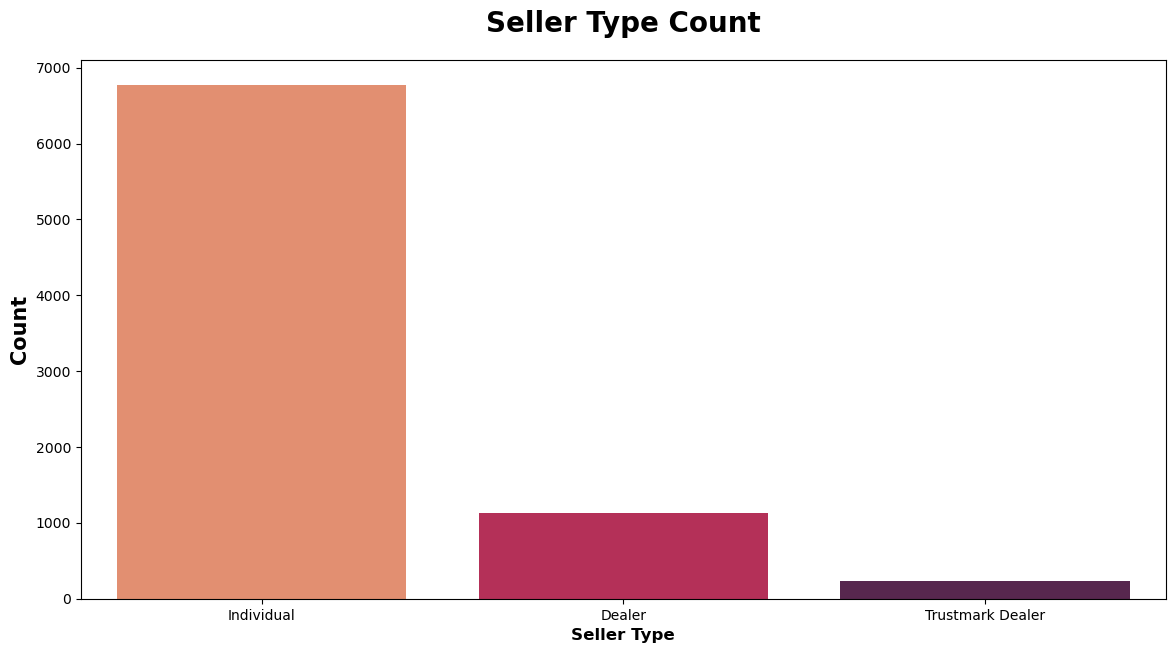

In [39]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df, palette="rocket_r")
plt.title("Seller Type Count", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()


In [40]:
# Calculate median selling price for each seller type, sorted descending
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()


,selling_price
seller_type,
Dealer,690000.0
Trustmark Dealer,650000.0
Individual,400000.0


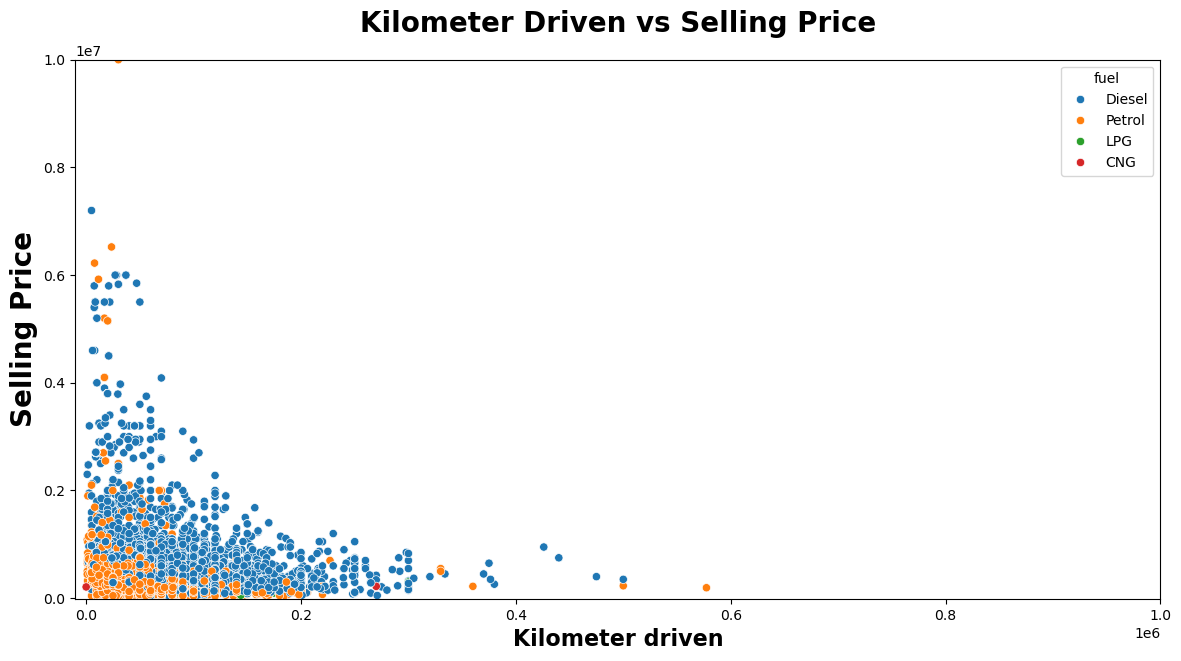

In [41]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df, ec = "white", color='b', hue='fuel')
plt.title("Kilometer Driven vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,1000000) # used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()


In [42]:
# Displaying the first few records of the dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,vehicle_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,18


In [43]:
df_model = df.copy()
df_model.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,vehicle_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,18


In [44]:
df_model.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,vehicle_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,18


In [45]:
df_model=pd.get_dummies(df_model,dtype=float)
df_model

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats,vehicle_age,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,...,max_power_254.8,max_power_258,max_power_261.4,max_power_265,max_power_270.9,max_power_272,max_power_280,max_power_282,max_power_400,max_power_
0,2014,450000,145500,23.40,1248.0,5.0,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,370000,120000,21.14,1498.0,5.0,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006,158000,140000,17.70,1497.0,5.0,19,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,225000,127000,23.00,1396.0,5.0,15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,130000,120000,16.10,1298.0,5.0,18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197.0,5.0,12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8124,2007,135000,119000,16.80,1493.0,5.0,18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8125,2009,382000,120000,19.30,1248.0,5.0,16,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8126,2013,290000,25000,23.57,1396.0,5.0,12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
import pickle

# Save the column names used in training
with open("columns.pkl", "wb") as f:
    pickle.dump(df_model.drop('selling_price', axis=1).columns.tolist(), f)


In [47]:
X = df_model.drop('selling_price', axis=1)
X

,year,km_driven,mileage(km/ltr/kg),engine,seats,vehicle_age,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,...,max_power_254.8,max_power_258,max_power_261.4,max_power_265,max_power_270.9,max_power_272,max_power_280,max_power_282,max_power_400,max_power_
0,2014,145500,23.40,1248.0,5.0,11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498.0,5.0,11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006,140000,17.70,1497.0,5.0,19,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,127000,23.00,1396.0,5.0,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,120000,16.10,1298.0,5.0,18,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,18.50,1197.0,5.0,12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8124,2007,119000,16.80,1493.0,5.0,18,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8125,2009,120000,19.30,1248.0,5.0,16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8126,2013,25000,23.57,1396.0,5.0,12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
y = df_model['selling_price']
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

In [49]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X[['mileage(km/ltr/kg)', 'engine', 'seats']] = imputer.fit_transform(
    X[['mileage(km/ltr/kg)', 'engine', 'seats']]
)

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
print(model.fit(X,y))


ExtraTreesRegressor()


In [51]:
print('-'*50)
print('Checking for feature importance')
print('-'*50)
print(model.feature_importances_)


--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[4.51593646e-02 1.50923521e-02 9.76310562e-03 ... 6.07458007e-05
 4.12160851e-03 1.00614384e-08]


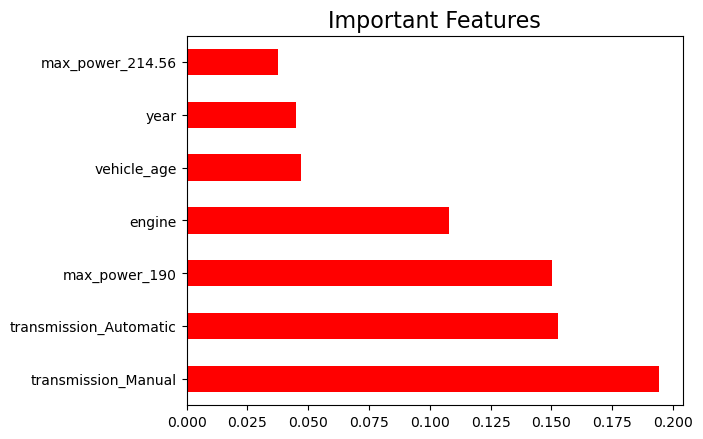

In [52]:
imp_feature = pd.Series(model.feature_importances_, index=X.columns)
imp_feature.nlargest(7).plot(kind='barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)

In [54]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [70]:
# Importing necessary libraries for data analysis, visualization, and data download
# pandas for data manipulation, numpy for numerical operations
# matplotlib/seaborn/plotly for visualization, urllib for downloading data
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
import numpy as np
import pandas as pd

models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Empty lists to store metrics
mse = []
rmse = []
evs = []
r_square_score = []

# Run models and collect metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    mse_val = mean_squared_error(y_test, pred)
    rmse_val = np.sqrt(mse_val)
    evs_val = explained_variance_score(y_test, pred)
    r2_val = r2_score(y_test, pred)

    mse.append(mse_val)
    rmse.append(rmse_val)
    evs.append(evs_val)
    r_square_score.append(r2_val)

    print(f"\n{name}")
    print(f"  MSE   : {mse_val:.2f}")
    print(f"  RMSE  : {rmse_val:.2f}")
    print(f"  EVS   : {evs_val:.4f}")
    print(f"  R²    : {r2_val:.4f}")

# Create DataFrame for comparison
ML_model_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Mean Squared Error": mse,
    "Root Mean Squared Error": rmse,
    "Explained Variance Score": evs,
    "R-Square Score(Accuracy)": r_square_score
})

# Show table
print("\n🔍 Model Comparison Table:\n")
print(ML_model_df)



Linear Regression
  MSE   : 29061516762.61
  RMSE  : 170474.39
  EVS   : 0.9541
  R²    : 0.9541

Support Vector Regression
  MSE   : 674335297230.15
  RMSE  : 821179.21
  EVS   : 0.0002
  R²    : -0.0643

Decision Tree Regressor
  MSE   : 26085611587.04
  RMSE  : 161510.41
  EVS   : 0.9588
  R²    : 0.9588

Random Forest Regressor
  MSE   : 16233372948.13
  RMSE  : 127410.25
  EVS   : 0.9744
  R²    : 0.9744

Ridge
  MSE   : 27956504381.12
  RMSE  : 167201.99
  EVS   : 0.9559
  R²    : 0.9559

Lasso
  MSE   : 21010601605.84
  RMSE  : 144950.34
  EVS   : 0.9669
  R²    : 0.9668

🔍 Model Comparison Table:

                       Model  Mean Squared Error  Root Mean Squared Error  \
0          Linear Regression        2.906152e+10            170474.387409   
1  Support Vector Regression        6.743353e+11            821179.211397   
2    Decision Tree Regressor        2.608561e+10            161510.407055   
3    Random Forest Regressor        1.623337e+10            127410.254486   
4

In [73]:

ML_model_df = pd.DataFrame({
    "Model": ['Linear Regression', 'Support Vector Regression', 'Decision Tree Regressor',
              'Random Forest Regressor', 'Ridge', 'Lasso'],
    "Mean Squared Error": mse,
    "Root Mean Squared Error": rmse,
    "Explained Variance Score": evs,
    "R-Square Score(Accuracy)": r_square_score
})

ML_model_df.set_index('Model', inplace=True)
ML_model_df


,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score(Accuracy)
Model,,,,
Linear Regression,2.906152e+10,170474.387409,0.954142,0.954132
Support Vector Regression,6.743353e+11,821179.211397,0.000234,-0.064317
Decision Tree Regressor,2.608561e+10,161510.407055,0.958836,0.958829
Random Forest Regressor,1.623337e+10,127410.254486,0.974389,0.974379
Ridge,2.795650e+10,167201.986774,0.955946,0.955876
Lasso,2.101060e+10,144950.341862,0.966905,0.966839


In [75]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
import numpy as np

# Initialize metric lists
mse = []
rmse = []
evs = []
r_square_score = []

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model with the training data
random_search.fit(X_train, y_train)

# Best hyperparameters from the RandomizedSearchCV
best_rf = random_search.best_estimator_

# Make predictions on the test data using the tuned model
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics for RandomForest
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
evs_rf = explained_variance_score(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Append the results
mse.append(mse_rf)
rmse.append(rmse_rf)
evs.append(evs_rf)
r_square_score.append(r2_rf)

# Print the best hyperparameters and evaluation scores
print('-' * 60)
print(f"Best Hyperparameters for RandomForest:\n{random_search.best_params_}")
print('-' * 60)
print(f"RandomForest MSE: {mse_rf:.2f}")
print(f"RandomForest RMSE: {rmse_rf:.2f}")
print(f"Explained Variance Score (EVS): {evs_rf:.4f}")
print(f"R^2 Score: {r2_rf:.4f}")
print('-' * 60)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------------------------------------------------------
Best Hyperparameters for RandomForest:
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
------------------------------------------------------------
RandomForest MSE: 17676098470.41
RandomForest RMSE: 132951.49
Explained Variance Score (EVS): 0.9721
R^2 Score: 0.9721
------------------------------------------------------------


In [76]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
models = [LinearRegression, RandomForestRegressor]

saved_models = []

for model_class in models:
    model = model_class()  # Instantiate the model
    regressor = model.fit(X_train, y_train)  # Train the model

    # Save to .pkl file
    model_filename = f"{model.__class__.__name__}_model.pkl"
    with open(model_filename, 'wb') as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)


In [77]:
saved_models

['LinearRegression_model.pkl', 'RandomForestRegressor_model.pkl']

In [80]:
# Load the best model (RandomForestRegressor in this case)
best_model = RandomForestRegressor().fit(X_train, y_train)  # Or just use the existing trained one if available

# Save it as best_model.pkl
import pickle
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

# Save the columns used in training for later use during prediction
with open("columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)


In [81]:
# Importing necessary libraries for data analysis, visualization, and data download
# pandas for data manipulation, numpy for numerical operations
# matplotlib/seaborn/plotly for visualization, urllib for downloading data
import pandas as pd
import pickle

# Load the saved best model
with open("best_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Load the columns used during training
with open("columns.pkl", "rb") as col_file:
    columns = pickle.load(col_file)

# New car input
new_car = {
    'year': 2019,
    'km_driven': 71205,
    'mileage': 21.40,
    'engine': 1197.83,
    'max_power': 1.5,
    'seats': 5,
    'fuel': 'Petrol',
    'seller_type': 'Individual',
    'transmission': 'Manual',
    'owner': 'First Owner'
}

# Prepare input for prediction
new_car_df = pd.DataFrame([new_car])
new_car_encoded = pd.get_dummies(new_car_df)
new_car_encoded = new_car_encoded.reindex(columns=columns, fill_value=0)

# Predict the price
predicted_price = model.predict(new_car_encoded)
print("Predicted Selling Price:", predicted_price[0])


Predicted Selling Price: 503399.98
